In [0]:
import csv as csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets
import numpy as np
import requests
import time
from config import (gkey)

In [7]:
file = pd.read_csv("more_reviews_removed_below_1000.csv")
file.tail()

,Unnamed: 0,Business ID,Review,Compound,Business Name,Business Alias,Category,City,State,ZipCode,Lat,Long,Review Count,Rating
9450,34400,fwMct4BJGRKTIilaGaDPqA,For the first time in almost fifteen years of ...,0.7264,Chavez & Valko,chavez-and-valko-dallas,immigrationlawyers,Dallas,TX,75231.0,32.892143,-96.768345,3,5.0
9451,34401,fwMct4BJGRKTIilaGaDPqA,"Thank you to Martin Valko, and the entire team...",0.3612,Chavez & Valko,chavez-and-valko-dallas,immigrationlawyers,Dallas,TX,75231.0,32.892143,-96.768345,3,5.0
9452,34405,Z2QzEPTUAKo-OKFh-N7Lsg,"Ellen is truly phenomenal, her work ethics is ...",0.6997,Law Office Of Ellen Schutz,law-office-of-ellen-schutz-dallas,divorce,Dallas,TX,75231.0,32.889150,-96.768350,3,5.0
9453,34406,Z2QzEPTUAKo-OKFh-N7Lsg,Ms. Schutz is an outstanding family law attorn...,0.8484,Law Office Of Ellen Schutz,law-office-of-ellen-schutz-dallas,divorce,Dallas,TX,75231.0,32.889150,-96.768350,3,5.0
9454,34407,Z2QzEPTUAKo-OKFh-N7Lsg,Ellen will tell you like it is and not BS you....,0.8625,Law Office Of Ellen Schutz,law-office-of-ellen-schutz-dallas,divorce,Dallas,TX,75231.0,32.889150,-96.768350,3,5.0


In [8]:
category_df = file[["Business ID", "Category", "Compound"]]
category_df.head()

,Business ID,Category,Compound
0,f3rkiilfzZVJlK0oxsmjqQ,lawyers,0.6369
1,f3rkiilfzZVJlK0oxsmjqQ,lawyers,0.5853
2,f3rkiilfzZVJlK0oxsmjqQ,lawyers,0.4767
3,t7LBdL4HifGJlMbn92WX7g,criminaldefense,0.6523
4,t7LBdL4HifGJlMbn92WX7g,criminaldefense,0.8591


In [20]:
compound_df = category_df.groupby("Category").mean().sort_values("Compound")
compound_df.reset_index()
compound_df.head()


,Compound
Category,
insurance,-0.649600
publicservicesgovt,-0.270600
nonprofit,-0.029386
chiropractors,0.009550
realestate,0.064400


In [21]:
review_df = file[["Category", "Business ID", "Review Count"]]
review_count = review_df.groupby(["Business ID"])["Review Count"].unique()
review_count = review_count.str[0]
review_count

review_df = pd.DataFrame(review_count)
review_df = review_df.reset_index()
review_df.head()


,Business ID,Review Count
0,--8c8rXzv02dPgcnsnu2cg,3
1,-03IpI8s4LZ9Z-6gHXcTAw,12
2,-0Mgg34kk6Ak0rZNY5Hkig,3
3,-0ZnXRjvcbe5WmlVX2sYRA,2
4,-0_T6Y1UHTUy4zEtzVckjg,2


In [50]:
category_df_nocompound = file[["Business ID", "Category"]]

merged = category_df_nocompound.merge(review_df, on = "Business ID", how = "outer")
merged = merged.groupby(["Business ID", "Category"])["Review Count"].unique()
merged = merged.str[0]
merged = pd.DataFrame(merged)
merged = merged.groupby("Category").sum()
merged = merged.sort_values("Review Count")

merged.tail(10 )



,Review Count
Category,
employmentlawyers,887
businesslawyers,892
realestatelawyers,1411
immigrationlawyers,1418
bankruptcy,1799
lawyers,1959
duilawyers,2154
criminaldefense,4148
divorce,4232


Text(0,0.5,'Review Polarity')

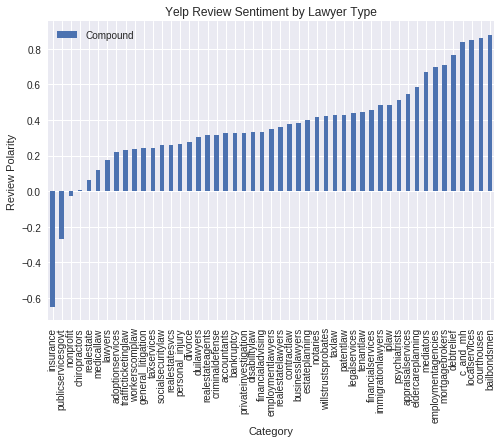

In [51]:

compound_df.plot(kind = "bar")
plt.title("Yelp Review Sentiment by Lawyer Type")
plt.ylabel("Review Polarity")

Text(0,0.5,'Number of Reviews')

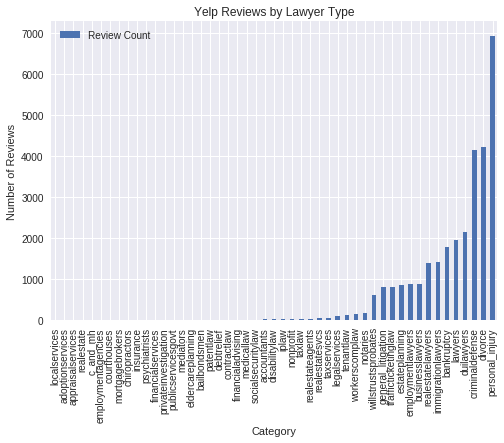

In [52]:
merged.plot(kind = "bar")
plt.title("Yelp Reviews by Lawyer Type")
plt.ylabel("Number of Reviews")

In [0]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [0]:
locations = file[["Lat", "Long"]].astype(float)
weight = file["Review Count"].astype(float)

In [19]:
# Create a review location markers
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
# Create a review count Heatmap layer
gmaps.configure(api_key=gkey)

marker_layer = gmaps.symbol_layer(
    locations, fill_color='green', stroke_color='green', scale=2
)
fig2 = gmaps.figure()
fig2.add_layer(marker_layer)
fig2

Figure(layout=FigureLayout(height='420px'))